# Project Milestone 1

## Victoria Hall
## DSC550
## 1.28.2022

The marketing campaign data set contains a set of details about a segment of customers. The purpose of the project will be to figure out how to identify the best customers to target for certain products and campaigns. We have a selection of demographic features about the customer as well as features about their activity on the website. A business might want to target specific customers for ad campaigns based on how receptive they will be to the campaign and if it will encourage the customer to shop for the item. Ideally, you would want to find customers that wouldn't buy the item but by seeing the ad, they will then buy the product. This is the most cost effective approach. The goal would be to identify the best set of predictors from the demographic and customer behavior data to build a profile of who to target for specific ad campaigns.  


DATA = https://www.kaggle.com/imakash3011/customer-personality-analysis 

In [1]:
#Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from datetime import datetime

In [2]:
#Reading in file. The data sources are separated by slashes rather than comma so setting delim to slash

df = pd.read_csv("marketing_campaign.csv", sep = '\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#Look at available data
print("There are {} cases in this dataframe".format(df.shape[0]))

#Checking types
df.dtypes

#checking missing values
df.isnull().sum()

There are 2240 cases in this dataframe


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 cases where income info is missing. 

In [4]:
#Looking at summary statistics of frame

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


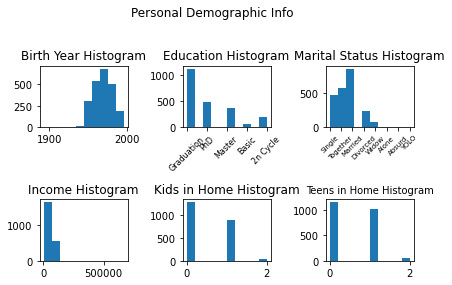

In [5]:
#looking at the columns
df.columns

#First I want to create a set of histograms looking at some of our basic personal demographic features.
#Below I have defined each histogram and created a series of plots of demographic info
plt.subplot(2,3,1)
plt.hist(df.Year_Birth)
plt.title("Birth Year Histogram")

plt.subplot(2,3,2)
plt.hist(df.Education)
plt.title("Education Histogram")
plt.xticks(rotation=45,fontsize=8)


plt.subplot(2,3,3)
plt.hist(df.Marital_Status)
plt.title("Marital Status Histogram")
plt.xticks(rotation=45,fontsize=7)


plt.subplot(2,3,4)
plt.hist(df.Income)
plt.title("Income Histogram")

plt.subplot(2,3,5)
plt.hist(df.Kidhome)
plt.title("Kids in Home Histogram")

plt.subplot(2,3,6)
plt.hist(df.Teenhome)
plt.title("Teens in Home Histogram",fontsize=10)

plt.suptitle("Personal Demographic Info")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Our plots above show us where the majority of our data is distributed for each demographic feature and also higlights that we may have outliers. I chose to use histograms to represent the distribution of this  data. 

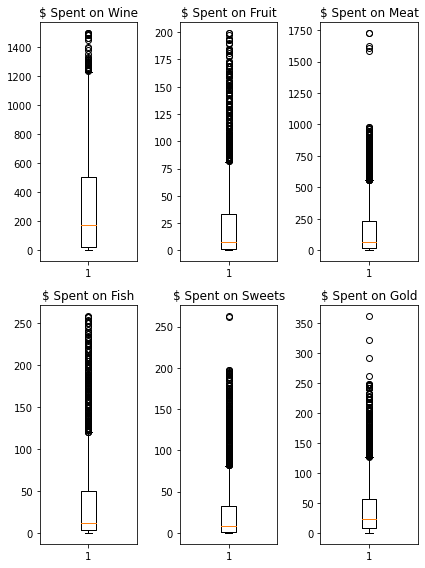

In [6]:
#Creating boxplots to look for outliers in the amount of money spent on each product type

plt.subplot(2,3,1)
plt.boxplot(df.MntWines)
plt.title("$ Spent on Wine")


plt.subplot(2,3,2)
plt.boxplot(df.MntFruits)
plt.title("$ Spent on Fruit")

plt.subplot(2,3,3)
plt.boxplot(df.MntMeatProducts)
plt.title("$ Spent on Meat")

plt.subplot(2,3,4)
plt.boxplot(df.MntFishProducts)
plt.title("$ Spent on Fish")

plt.subplot(2,3,5)
plt.boxplot(df.MntSweetProducts)
plt.title("$ Spent on Sweets")

plt.subplot(2,3,6)
plt.boxplot(df.MntGoldProds)
plt.title("$ Spent on Gold")

plt.tight_layout(rect=[0,0,1,2])
plt.show()

Our boxplots show us the quartile ranges of the distribution of how much money was spent on each product type. Again we some outliers here and large tails on our distribution.

<AxesSubplot:>

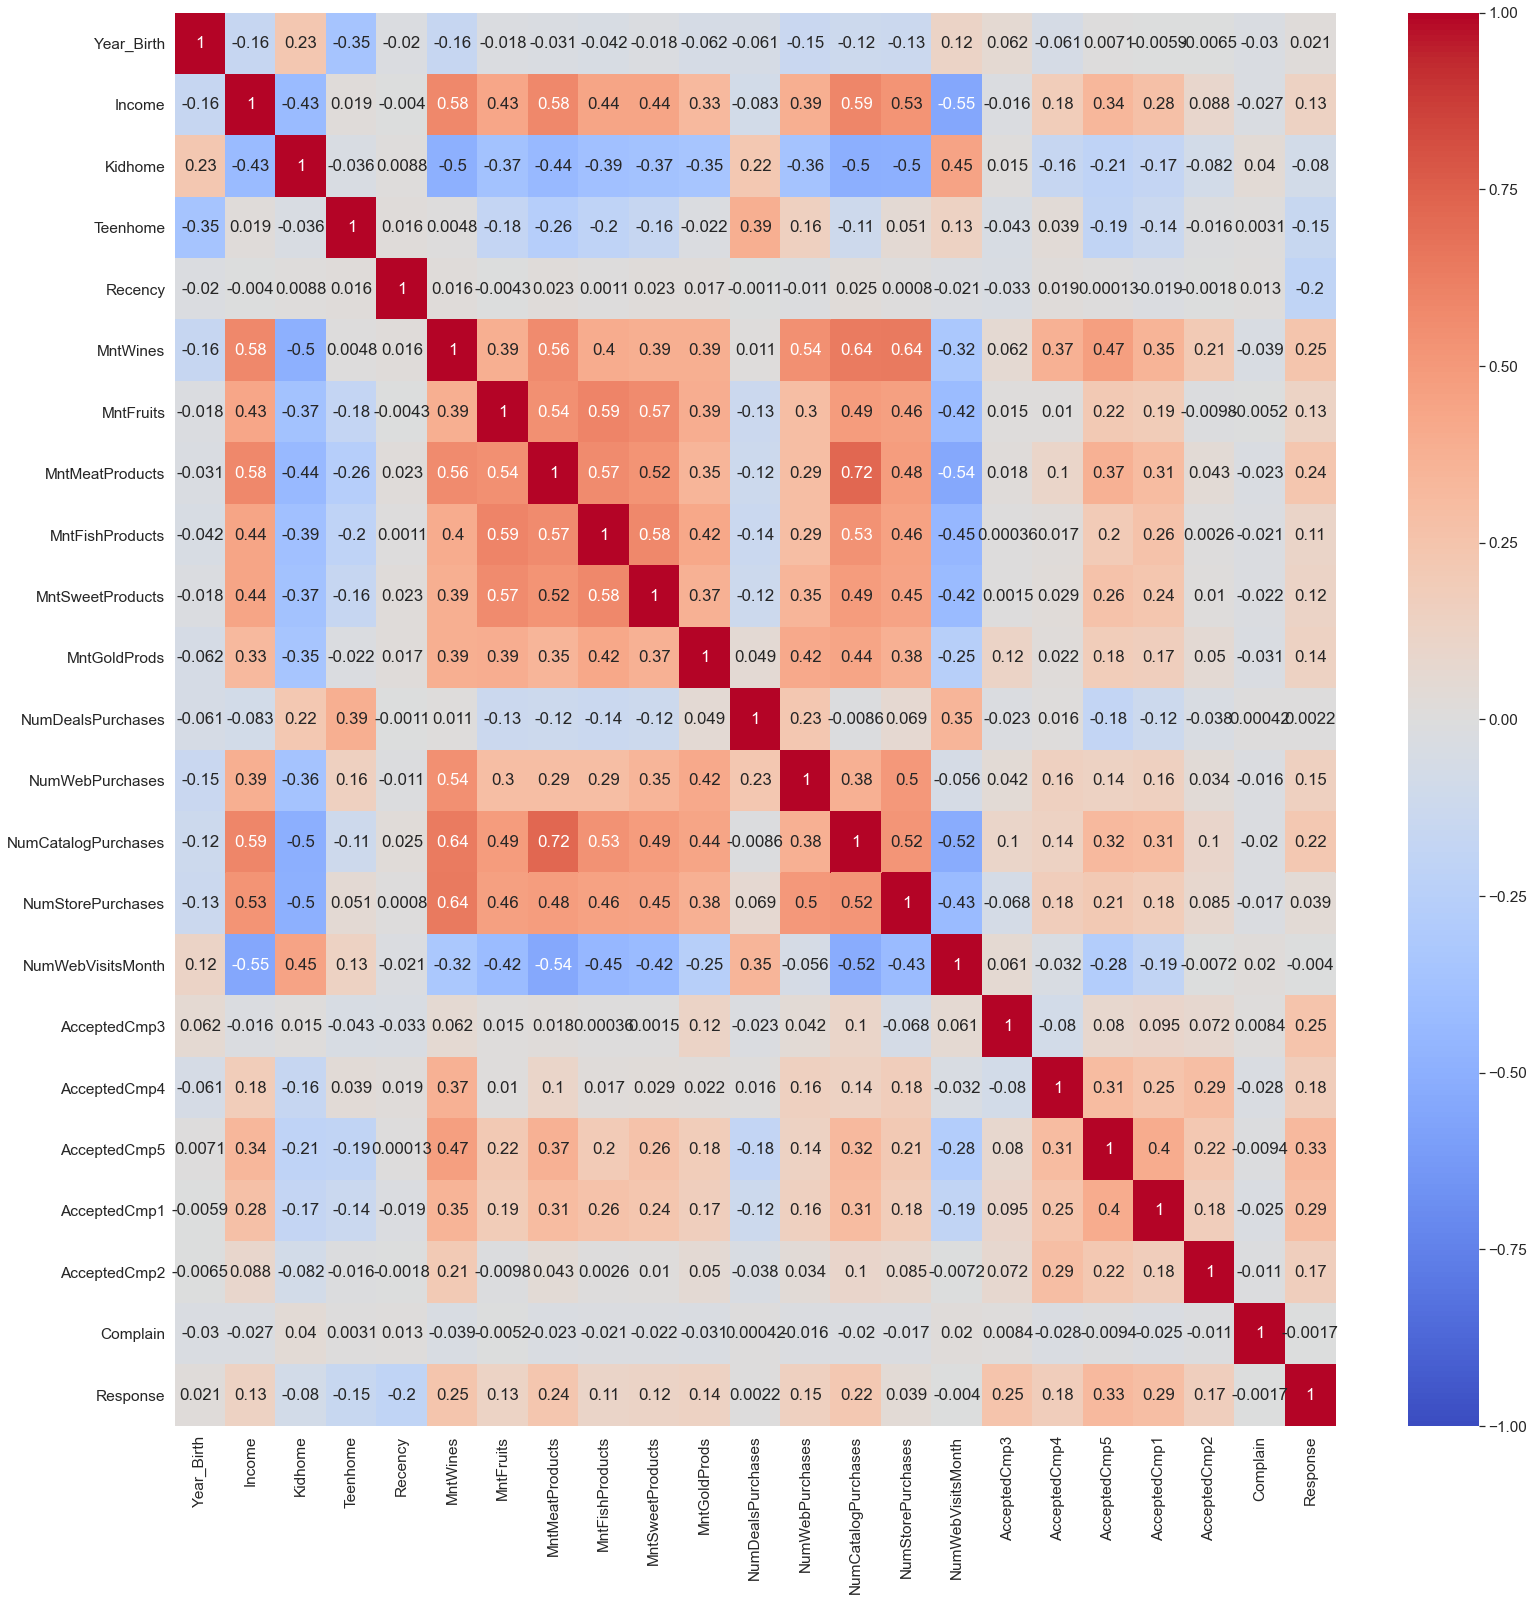

In [7]:
#Making a heatmap of the correlation betweeen our features
#I'm going to create a separate dataframe that eliminates some unnecessary columns to make our map more clear

df2 = df.drop(['Z_CostContact','Z_Revenue','ID'],axis=1)

#Checking how many columns
df2.shape[1]

#Scaling fonts for easier reading, Setting figure size based on number of columns
sns.set(font_scale=1.4)
plt.figure(figsize=(26,26))

corr = df2.corr()

#Setting vmin to -1 and mapping colors so we can see over saturated colors indicate high correlation (red is pos blue is neg)
sns.heatmap(corr, annot=True,vmin=-1,cmap="coolwarm")


Our heatmap shows where we see correlation among our variables. This will help us decide what features to include in our model. We can see things like complaints and the amount of days since last purchase (recency) have little to no correlation with our other variables, while things like income, kids in the household correlate to a few different items. 

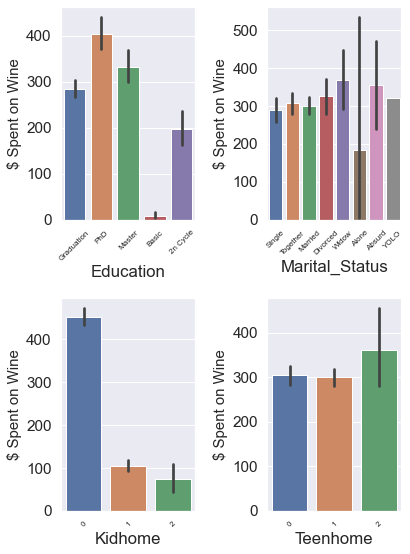

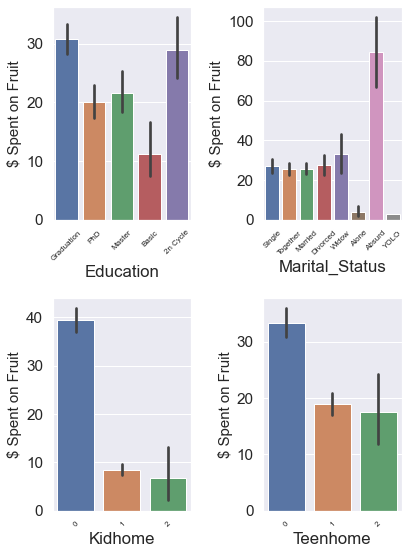

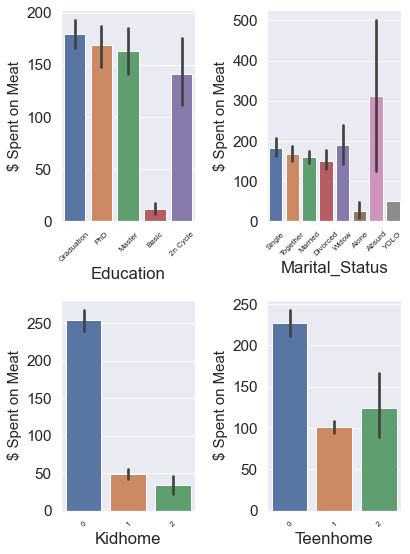

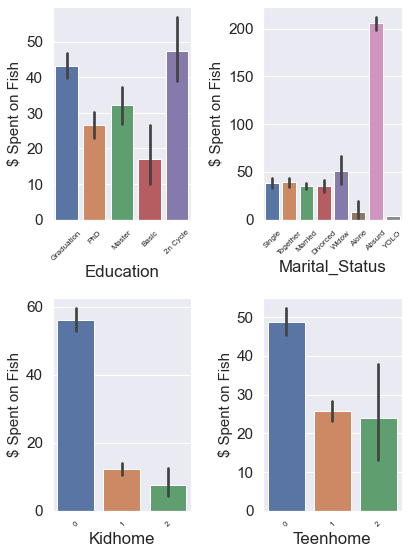

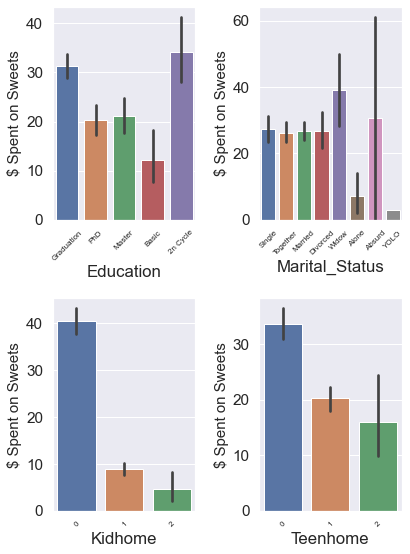

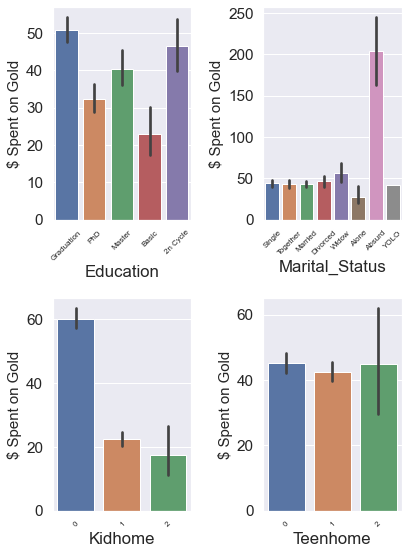

In [8]:
#As a final review I am going to look at how different demographics spend money on different product types. 

#There are 6 main product types. I am going to create a series of plots for each. 
 
count = 1

#renaming food columns
df2=df2.rename(columns={'MntWines':'Wine','MntFruits':'Fruit','MntMeatProducts': 'Meat','MntFishProducts':'Fish',
                    'MntSweetProducts':'Sweets','MntGoldProds':'Gold'})

#Creating function to generate grpahs
def demochart(item, count):
    for i in df2[['Education','Marital_Status','Kidhome','Teenhome']]:
        plt.subplot(2,2,count)
        sns.barplot(x=i,y=item,data=df2,)
        plt.xticks(rotation=45,fontsize=8)
        plt.ylabel("$ Spent on {}".format(item), fontsize = 15)
        count+=1
        plt.tight_layout(rect=[0,0,1,2])
    plt.show()
    
     
#creating list of items
items = df2[['Wine','Fruit','Meat','Fish','Sweets','Gold']]


#Iterating through items to create bar charts based on $ Spent of item types by demographic
for item in items:
    demochart(item,count)

The final set of charts looks at the money spent on different products by demographic details. This again shows us distribution but also shows some responses we will need to remove that don't make sense. For example, in the marital status, we have respondents who identified with probably joke answers like Absurd and and YOLO. In the next milestone I will set to get rid of fake answers. 

### Next Steps
Our initial graphic analysis shows us a distribution breakdown of different subsets of our data. In the next phase I will need to clean up missing data, false data, and eliminate unnecessary rows or columns. I will also need to address the outliers our graphical analysis uncoverd. Finally I will need to set up my data for clustering as I am going to create classification groups of customers to target for advertising for specific item groups.

## Milestone 2
The dataset in its current state contains both demographic features as well as features about how the customers interact with the website and their spending habits on different products. Within this store interaction data, we have information about 5 different marketing campaigns that were run. Our data source doesn't give us explicit details about each campaign and what they were but there are 5 different campaigns with boolean responses that indicate whether the customer accepted the campaign or not. The overarching goal of this project would be to create clusters and then using those clusters, figure out which cluster is the most receptive to each campaign. We can assume the subject matter experts in our marketing department will have more information about each campaign and we can then recommend which cluster is the most responsive to each ad campaign so that they can better target customers in the future for those campaigns. 

Before those steps can be completed we need to clean our data and assess our features to figure out which we should use to train our model. 

### Dealing with missing data

In milestone 1, we saw that one column has missing data, income. Our correlation map also showed that income does appear to correlate to some our variables in significant ways. This tells me income is an important factor in our analysis. I am going to drop cases where income data is missing. It also important to note that in milestone one we did remove some columns that only contained missing information. Those were columns: Z_CostContact and Z_Revenue.

In [9]:
#Showing the current state of the data frame
print("There are currently 2240 cases in our data")


#Showing missing values
print(df2.isnull().sum())


#dropping cases with missing income data.It is the only column with missing data so I can apply dropna to the whole frame
#Setting inplace to true so it maintains the change on df2
df2.dropna(axis=0, inplace=True)


print("There are now {} cases in our dataframe after dropping missing values".format(df2.shape[0]))

There are currently 2240 cases in our data
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wine                    0
Fruit                   0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64
There are now 2216 cases in our dataframe after dropping missing values


### Transforming features 


#### Dealing with dates and converting to date-time objects

We have a couple of features that are date based. I'm going to handle these in two different ways. First we have the date of birth for the customer. A more clear customer profile would look at age rather than birth year so I am going to determine the age of the customer and then drop this year of birth column. The second date based column is Dt_Customer. This column tells us when the customer enrolled with the company. I am going to transform this into a column that assigns a value based on seniority. I'm creating three groups. I'm going to call our oldest customers Gold, middle Silver, and newest bronze. 

In [10]:
df2['Dt_Customer'].value_counts()

31-08-2012    12
12-09-2012    11
14-02-2013    11
12-05-2014    11
22-05-2014    10
              ..
16-05-2013     1
13-01-2014     1
15-08-2012     1
26-06-2013     1
04-06-2014     1
Name: Dt_Customer, Length: 662, dtype: int64

In [11]:
#Our dataframe currently tells us the year of birth for the customer. I am going to convert this age so we can partially identify
#customer segments by age.

#I cannot figure out what year this data is from. For the purpose of this project I'm going to assume it was last year
df2['Age'] = 2021 - df2['Year_Birth']

#Dropping year_birth column since we are going to use age instead to prevent correlation issues
df2 = df2.drop(['Year_Birth'],axis=1)



In [12]:
#Column Dt_Customer tells us the date the customer enrolled in the with the company. I'm going to convert this to a date time object.

df2['Dt_Customer'] = pd.to_datetime(df2['Dt_Customer'], format='%d-%m-%Y')



In [13]:
#checking dataframe
print(df2.dtypes)


#Checking date ranges
newest=max(df2['Dt_Customer'])
oldest=min(df2['Dt_Customer'])
print("Most recent enrollment date:",newest)
print("Earliest enrollment date:",oldest)

print("There are {} between the most recent enrollment and the oldest".format(newest-oldest))

#Creating a range based of the dates 
print(pd.date_range(oldest,newest,periods=4))


    

Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
Wine                            int64
Fruit                           int64
Meat                            int64
Fish                            int64
Sweets                          int64
Gold                            int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Response                        int64
Age                             int64
dtype: objec

In [14]:
#Creating buckets for seniority of customers based on enrollment dates
seniority = []

bucket1 = datetime.strptime('2013-03-19','%Y-%m-%d')
bucket2 = datetime.strptime('2013-11-07','%Y-%m-%d')
bucket3 = datetime.strptime('2014-06-29','%Y-%m-%d')


#Three buckets
for row in df2['Dt_Customer']:
    if row < bucket1:
        seniority.append("gold")
    elif row < bucket2:
        seniority.append("silver")
    else:
        seniority.append("bronze")
        
#adding to data frame
df2['Seniority'] = seniority

#Checking values. Our buckets are pretty evenly distributed
df2['Seniority'].value_counts()


#Dropping Dt_Customer from frame
df2 = df2.drop(['Dt_Customer'],axis=1)

#### Renaming some features and columns
We already did some initial work in milestone one to rename the columns of the amount spent on different food products. I am going to continue this process with some other columns to simplify. I'm also going to rename some of the responses in our categorical data to help simplify the profiles as well. 

In [15]:
#I'm going to rename the way in which customers made purchases
#Column response is if the customer accepted the offer in the last campaign. For consistency, I'm going to change this to AcceptCmp6
df2 = df2.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store','Response':'AcceptedCmp6'})

#I'm going to redefine the categories in marital status and education as well
df2['Marital_Status']=df2['Marital_Status'].replace({'Divorced':'Alone','Single':'Alone','Married':'In couple','Together':'In couple','Absurd':'Alone','Widow':'Alone','YOLO':'Alone'})
df2['Education']=df2['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})

#I'm going to create a new column that is a boolean response to say if the customer has a child or not. 
#I'm combining the teen and child column, then creating a boolean response. Then I'm going to drop the columns that aren't needed
df2['Children'] = df2['Kidhome']+df2['Teenhome']
df2['Has_Kids'] = np.where(df2.Children>0,'kids','no_kids')

df2 = df2.drop(['Kidhome','Teenhome','Children'],axis=1)


In [16]:
#Looking at the dataframe
df2.head(10)

,Education,Marital_Status,Income,Recency,Wine,Fruit,Meat,Fish,Sweets,Gold,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Seniority,Has_Kids
0,Postgraduate,Alone,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,64,gold,no_kids
1,Postgraduate,Alone,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,67,bronze,kids
2,Postgraduate,In couple,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,56,silver,no_kids
3,Postgraduate,In couple,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,37,bronze,kids
4,Postgraduate,In couple,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,40,bronze,kids
5,Postgraduate,In couple,62513.0,16,520,42,98,0,42,14,...,0,0,0,0,0,0,0,54,silver,kids
6,Postgraduate,Alone,55635.0,34,235,65,164,50,49,27,...,0,0,0,0,0,0,0,50,gold,kids
7,Postgraduate,In couple,33454.0,32,76,10,56,3,1,23,...,0,0,0,0,0,0,0,36,silver,kids
8,Postgraduate,In couple,30351.0,19,14,0,24,3,3,2,...,0,0,0,0,0,0,1,47,silver,kids
9,Postgraduate,In couple,5648.0,68,28,0,6,1,1,13,...,1,0,0,0,0,0,0,71,bronze,kids


#### Outliers
I am going to use Z Score to remove outlier values in our income data. I'm using Z score because it is a measure of how many standard deviations away the data point is from the mean. I do not want outliers to have undue effect on our campaign strategies. We are looking to create clusters of similar customer groups and the outlier could endanger good clustering because of the distance from the nearest neighbors.

In [17]:
#Looking at standard deviation of income
sd = np.std(df2['Income'])
mean = np.mean(df2['Income'])

print("The mean income is {} with a standard deviation of {}".format(mean,sd))

#importing library
from scipy.stats import zscore

#find Z score and only keeping choices with a z score less than 3. 
df2['z']=abs(zscore(df2['Income']))

df2 = df2[df2['z'] <3]

print("There are now {} cases in our data".format(df2.shape[0]))

#Dropping zscore from frame


df2 = df2.drop(['z'],axis=1)

The mean income is 52247.25135379061 with a standard deviation of 25167.39617416297
There are now 2208 cases in our data


In [18]:
#Looking at the cleaned dataframe
df2.head(5)

,Education,Marital_Status,Income,Recency,Wine,Fruit,Meat,Fish,Sweets,Gold,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6,Age,Seniority,Has_Kids
0,Postgraduate,Alone,58138.0,58,635,88,546,172,88,88,...,0,0,0,0,0,0,1,64,gold,no_kids
1,Postgraduate,Alone,46344.0,38,11,1,6,2,1,6,...,0,0,0,0,0,0,0,67,bronze,kids
2,Postgraduate,In couple,71613.0,26,426,49,127,111,21,42,...,0,0,0,0,0,0,0,56,silver,no_kids
3,Postgraduate,In couple,26646.0,26,11,4,20,10,3,5,...,0,0,0,0,0,0,0,37,bronze,kids
4,Postgraduate,In couple,58293.0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,0,40,bronze,kids


In [19]:
#Creating dummy variables for categorical features
df2 = pd.get_dummies(df2)

In [20]:
df2.columns

from sklearn.model_selection import train_test_split

#Before I perform PCA I want to go ahead and split into my training and test sets
#splitting into features and targets
x = df2.drop(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp6'], axis=1)
y1=df2['AcceptedCmp1']
y2=df2['AcceptedCmp2']
y3=df2['AcceptedCmp3']
y4=df2['AcceptedCmp4']
y5=df2['AcceptedCmp5']
y6=df2['AcceptedCmp6']

#Splitting each set
x_train1, x_test1,y_train1, y_test1 = train_test_split(x,y1, test_size=.2)
x_train2, x_test2,y_train2, y_test2 = train_test_split(x,y2, test_size=.2)
x_train3, x_test3,y_train3, y_test3 = train_test_split(x,y3, test_size=.2)
x_train4, x_test4,y_train4, y_test4 = train_test_split(x,y4, test_size=.2)
x_train5, x_test5,y_train5, y_test5 = train_test_split(x,y5, test_size=.2)
x_train6, x_test6,y_train6, y_test6 = train_test_split(x,y6, test_size=.2)


In [21]:
df2.head(5)

,Income,Recency,Wine,Fruit,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,...,Age,Education_Postgraduate,Education_Undergraduate,Marital_Status_Alone,Marital_Status_In couple,Seniority_bronze,Seniority_gold,Seniority_silver,Has_Kids_kids,Has_Kids_no_kids
0,58138.0,58,635,88,546,172,88,88,3,8,...,64,1,0,1,0,0,1,0,0,1
1,46344.0,38,11,1,6,2,1,6,2,1,...,67,1,0,1,0,1,0,0,1,0
2,71613.0,26,426,49,127,111,21,42,1,8,...,56,1,0,0,1,0,0,1,0,1
3,26646.0,26,11,4,20,10,3,5,2,2,...,37,1,0,0,1,1,0,0,1,0
4,58293.0,94,173,43,118,46,27,15,5,5,...,40,1,0,0,1,1,0,0,1,0


## Milestone 3 Model 
I plan to use clusters as features in a logistic regression model. Before I do so, I will need to create a couple some baseline models. 

In [117]:
#Importing packages
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics
from sklearn.metrics import accuracy_score
import warnings
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report


### Step 1 - Creating baseline kmeans models

In [42]:
#Creating a standarizer
scaler = StandardScaler()


#Creating a baseline KNN classifer.Choosing 3 to initialize
kmeans = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300)

In [43]:
#Creating a pipeline
pipe = Pipeline([('scaler',scaler),('kmeans',kmeans)])

In [44]:
#Creating a function to fit the model to each of the datasets and provide some baseline information about model performance

def run_pipe(x_train,y_train,x_test,y_test):
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    #RMSE
    print('RMSE of Test Data is {:.2}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
    #F1 Score
    print("F1 Score is {:.2}".format(f1_score(y_test,y_pred,average="micro")))
    #Accuracy
    print("The Accuracy score of the base model is {:.2%}:".format(accuracy_score(y_test,y_pred)))
    

In [45]:
print("Three Cluster Model Analysis")
print("-"*50)
print("Campaign 1 Base KMeans Model:")
run_pipe(x_train1,y_train1,x_test1,y_test1)
print("-"*50)

print("Campaign 2 Base KMeans Model:")
run_pipe(x_train2,y_train2,x_test2,y_test2)
print("-"*50)

print("Campaign 3 Base KMeans Model:")
run_pipe(x_train3,y_train3,x_test3,y_test3)
print("-"*50)

print("Campaign 4 Base KMeans Model:")
run_pipe(x_train4,y_train4,x_test4,y_test4)
print("-"*50)

print("Campaign 5 Base KMeans Model:")
run_pipe(x_train5,y_train5,x_test5,y_test5)
print("-"*50)

print("Campaign 6 Base KMeans: Model")
run_pipe(x_train6,y_train6,x_test6,y_test6)
print("-"*50)

Three Cluster Model Analysis
--------------------------------------------------
Campaign 1 Base KMeans Model:
RMSE of Test Data is 1.1
F1 Score is 0.55
The Accuracy score of the base model is 54.52%:
--------------------------------------------------
Campaign 2 Base KMeans Model:
RMSE of Test Data is 1.2
F1 Score is 0.47
The Accuracy score of the base model is 46.61%:
--------------------------------------------------
Campaign 3 Base KMeans Model:
RMSE of Test Data is 1.2
F1 Score is 0.25
The Accuracy score of the base model is 24.89%:
--------------------------------------------------
Campaign 4 Base KMeans Model:
RMSE of Test Data is 1.0
F1 Score is 0.53
The Accuracy score of the base model is 52.94%:
--------------------------------------------------
Campaign 5 Base KMeans Model:
RMSE of Test Data is 1.3
F1 Score is 0.17
The Accuracy score of the base model is 16.52%:
--------------------------------------------------
Campaign 6 Base KMeans: Model
RMSE of Test Data is 1.1
F1 Score i

### Step 2 Optimizing the Clustering
Improving base models by searching for best hyperparameter of number of clusters


In [50]:
#Creating a search space for 15 different clusters
search_space = [{"kmeans__n_clusters": [int(x) for x in np.linspace(start=1,stop=10,num=10)]}]


#Creating a function to find the optimal number of clusters for each campaign
def find_clusters(x_train,y_train):
    classifier = GridSearchCV(pipe,search_space,cv=5,verbose=0).fit(x_train,y_train)
    clusters = classifier.best_estimator_.get_params()["kmeans__n_clusters"]
    print(("{} is the best number of clusters".format(clusters)))

In [28]:
#ignoring warnings on kmeans clustering
warnings.filterwarnings("ignore")

In [51]:
#Finding best number of clusters for each campaign

print("Campaign 1:")
find_clusters(x_train1,y_train1)
print("-"*50)

print("Campaign 2:")
find_clusters(x_train2,y_train2)
print("-"*50)

print("Campaign 3:")
find_clusters(x_train3,y_train3)
print("-"*50)

print("Campaign 4:")
find_clusters(x_train4,y_train4)
print("-"*50)

print("Campaign 5:")
find_clusters(x_train5,y_train5)
print("-"*50)

print("Campaign 6:")
find_clusters(x_train6,y_train6)
print("-"*50)

Campaign 1:
10 is the best number of clusters
--------------------------------------------------
Campaign 2:
10 is the best number of clusters
--------------------------------------------------
Campaign 3:
10 is the best number of clusters
--------------------------------------------------
Campaign 4:
10 is the best number of clusters
--------------------------------------------------
Campaign 5:
10 is the best number of clusters
--------------------------------------------------
Campaign 6:
10 is the best number of clusters
--------------------------------------------------


When I am using grid search to find the right hyperparameter for the amount of clusters, it always chooses the largest value and I'm not sure why. I tried a number of different ones (even ranging up to 100) and everytime it picks the largest value. I can't figure out why it is doing this so I am using the elbow method.

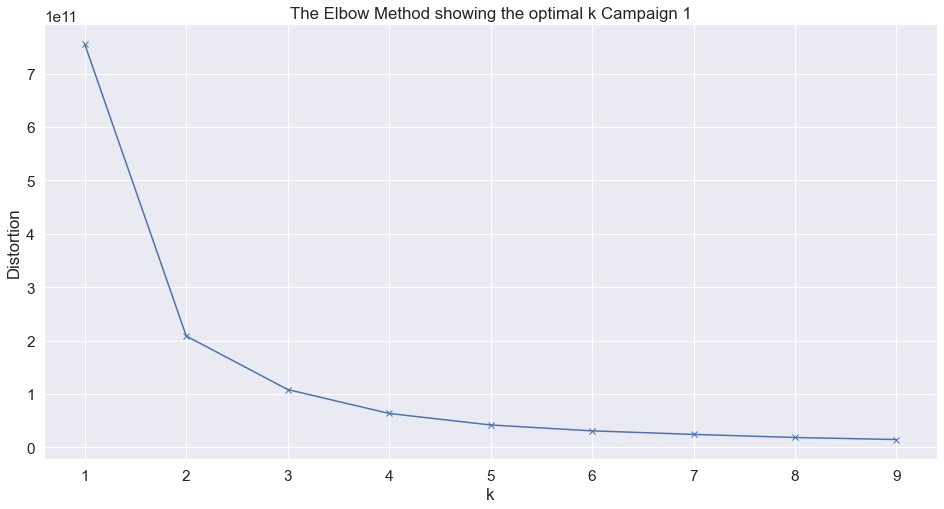

In [53]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_train1,y_train1)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k Campaign 1')
plt.show()


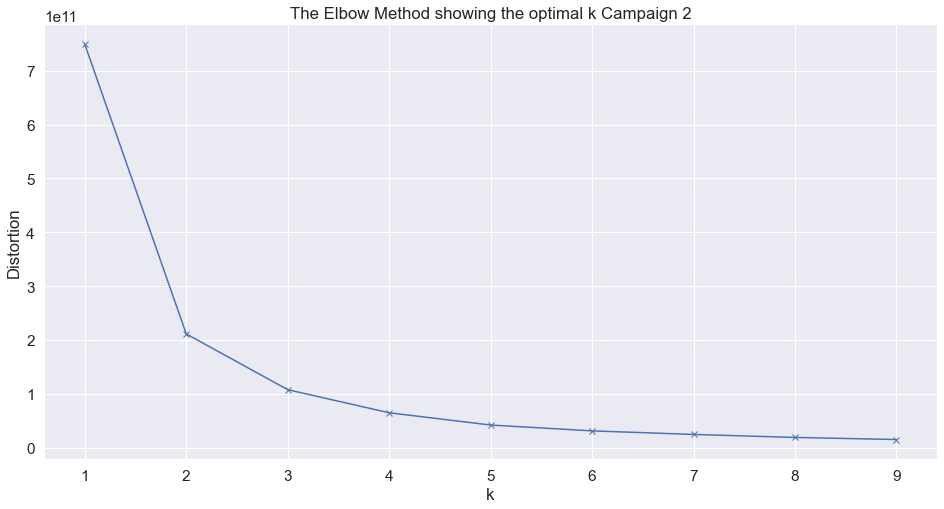

In [55]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_train2,y_train2)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k Campaign 2')
plt.show()

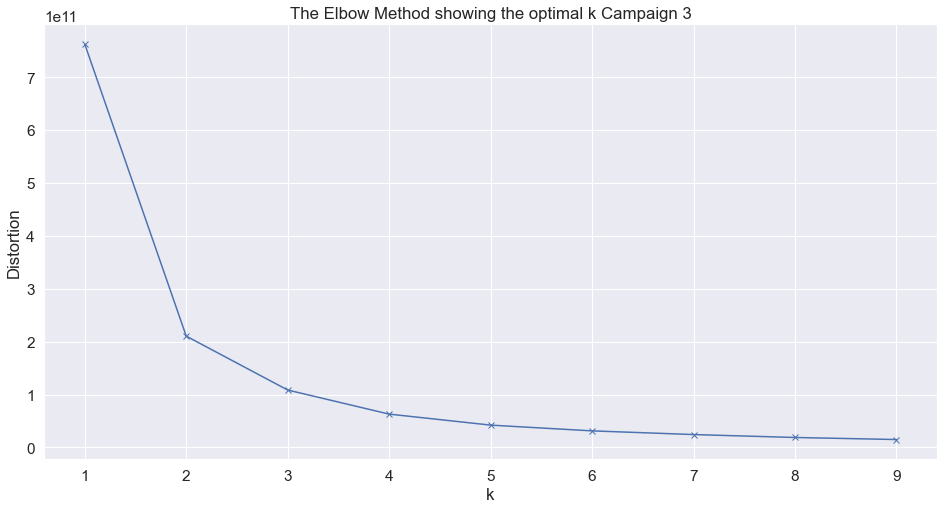

In [56]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_train3,y_train3)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k Campaign 3')
plt.show()

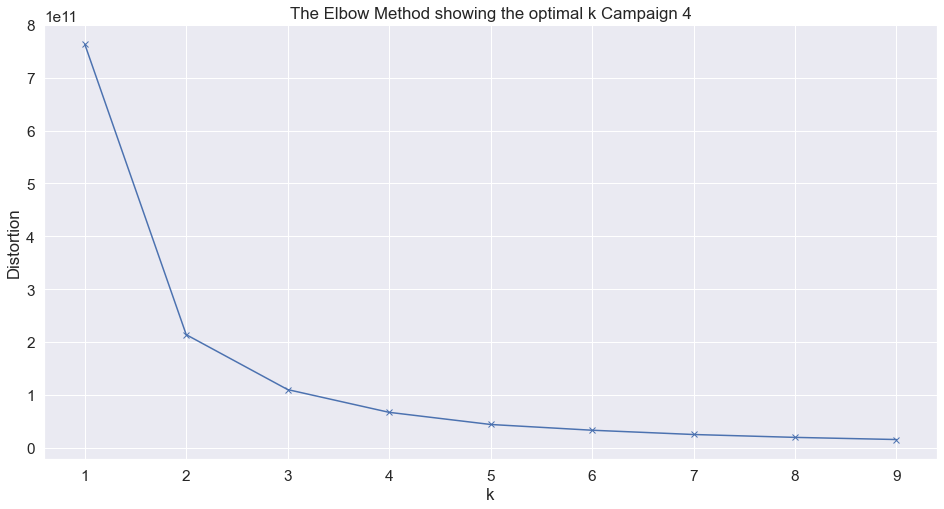

In [57]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_train4,y_train4)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k Campaign 4')
plt.show()

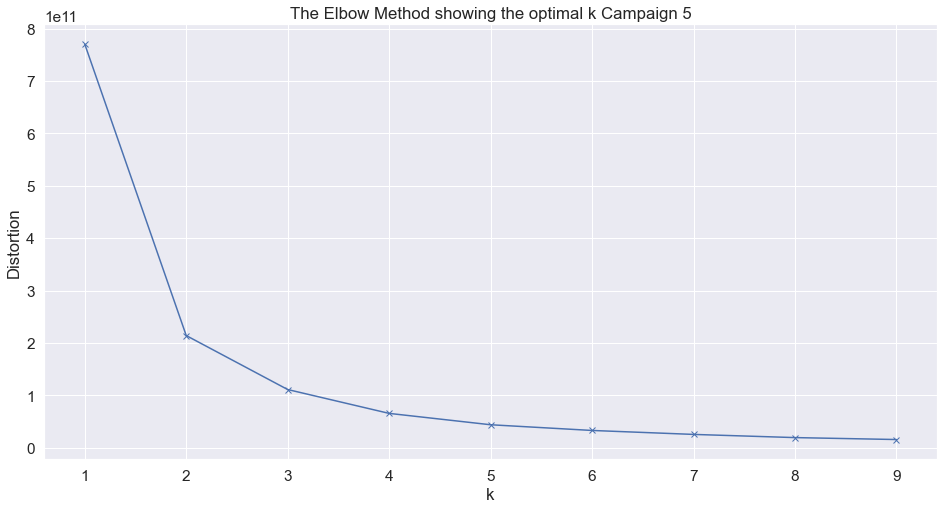

In [58]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_train5,y_train5)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k Campaign 5')
plt.show()

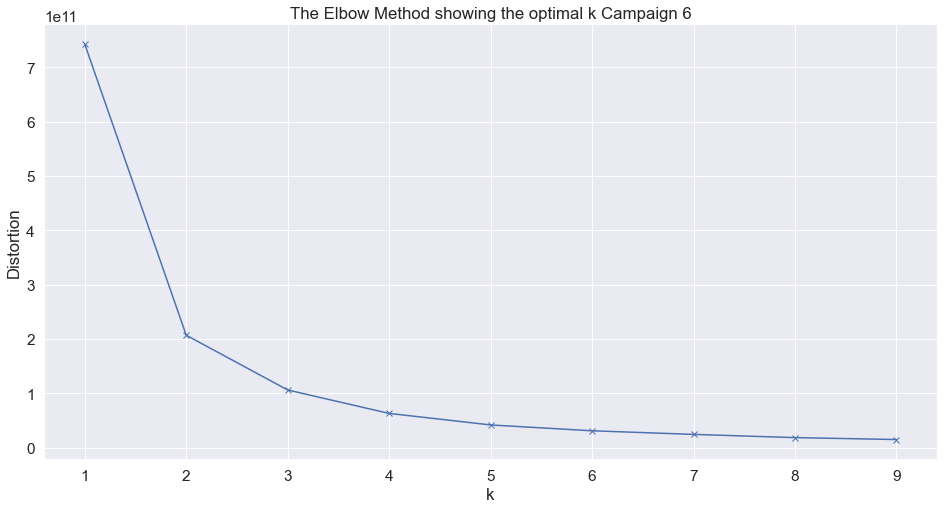

In [59]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_train6,y_train6)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k Campaign 6')
plt.show()

It appears that 3 is the optimal number of clusters for each of the campaigns. The inertia decreases at 3 significantly.I intially chose 3 clusters so I am going to leave it this way. 

### Step 3 Baseline Logistic Regression
Each campaign has a binary response of 0 or 1 if the customer accepted the offer. I am going to create a baseline logistic regression model for each campaign

In [95]:
#Making an instance of the model
logit_re = LogisticRegression()

pipe1 = Pipeline([('scaler',scaler),('logit_re',logit_re)])


def run_pipe1(x_train,y_train,x_test,y_test):
    pipe1.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    #RMSE
    print('RMSE of Test Data is {:.2}'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
    #F1 Score
    print("F1 Score is {:.2}".format(f1_score(y_test,y_pred,average="micro")))
    #Accuracy
    print("The Accuracy score of the base model is {:.2%}:".format(accuracy_score(y_test,y_pred)))
    #R2
    print('R2 of Test Data is {:.5}'.format(metrics.r2_score(y_test,y_pred)))
    

In [71]:
print("Campaign 1 Base Logistic Regression Model:")
run_pipe1(x_train1,y_train1,x_test1,y_test1)
print("-"*50)

print("Campaign 2 Base Logistic Regression Model:")
run_pipe1(x_train2,y_train2,x_test2,y_test2)
print("-"*50)

print("Campaign 3 Base Logistic Regression Model:")
run_pipe1(x_train3,y_train3,x_test3,y_test3)
print("-"*50)

print("Campaign 4 Base Logistic Regression Model:")
run_pipe1(x_train4,y_train4,x_test4,y_test4)
print("-"*50)

print("Campaign 5 Base Logistic Regression Model:")
run_pipe1(x_train5,y_train5,x_test5,y_test5)
print("-"*50)

print("Campaign 6 Base Logistic Regression Model")
run_pipe1(x_train6,y_train6,x_test6,y_test6)
print("-"*50)

Campaign 1 Base Logistic Regression Model:
RMSE of Test Data is 1.1
F1 Score is 0.56
The Accuracy score of the base model is 55.88%:
R2 of Test Data is -18.462
--------------------------------------------------
Campaign 2 Base Logistic Regression Model:
RMSE of Test Data is 1.2
F1 Score is 0.47
The Accuracy score of the base model is 46.61%:
R2 of Test Data is -87.255
--------------------------------------------------
Campaign 3 Base Logistic Regression Model:
RMSE of Test Data is 1.1
F1 Score is 0.47
The Accuracy score of the base model is 47.06%:
R2 of Test Data is -19.086
--------------------------------------------------
Campaign 4 Base Logistic Regression Model:
RMSE of Test Data is 1.1
F1 Score is 0.53
The Accuracy score of the base model is 52.71%:
R2 of Test Data is -16.749
--------------------------------------------------
Campaign 5 Base Logistic Regression Model:
RMSE of Test Data is 1.1
F1 Score is 0.55
The Accuracy score of the base model is 55.43%:
R2 of Test Data is -21.

In [72]:
from typing import Tuple

In [79]:
def get_clusters(x_train1: pd.DataFrame, x_test1: pd.DataFrame, n_clusters: int) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies k-means clustering to training data to find clusters and predicts them for the test set
    """
    clustering = KMeans(n_clusters=n_clusters, random_state=8675309,n_jobs=-1)
    clustering.fit(x_train1)
    # apply the labels
    train_labels = clustering.labels_
    X_train_clstrs = x_train1.copy()
    X_train_clstrs['clusters'] = train_labels
    
    # predict labels on the test set
    test_labels = clustering.predict(x_test1)
    X_test_clstrs = x_test1.copy()
    X_test_clstrs['clusters'] = test_labels
    return X_train_clstrs, X_test_clstrs



In [87]:
#Running function with 3 clusters for first 
x_train1_clstrs,x_clstrs1 = get_clusters(x_train1,x_test1,3)

x_train1_clstrs

,Income,Recency,Wine,Fruit,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,...,Education_Postgraduate,Education_Undergraduate,Marital_Status_Alone,Marital_Status_In couple,Seniority_bronze,Seniority_gold,Seniority_silver,Has_Kids_kids,Has_Kids_no_kids,clusters
1120,70566.0,4,381,28,215,84,28,21,2,6,...,1,0,1,0,0,0,1,1,0,0
1012,30168.0,51,154,20,66,0,12,27,7,6,...,1,0,1,0,0,1,0,1,0,2
1483,19107.0,49,2,4,9,10,5,16,2,1,...,1,0,0,1,0,0,1,1,0,2
601,62807.0,83,526,28,135,10,21,99,3,5,...,1,0,0,1,0,1,0,1,0,1
287,50898.0,88,285,28,242,55,114,135,13,6,...,1,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,65324.0,0,384,0,102,21,32,5,3,6,...,1,0,0,1,1,0,0,1,0,0
1113,98777.0,23,1000,19,711,125,115,38,0,4,...,1,0,1,0,1,0,0,0,1,0
725,44794.0,99,54,0,7,0,0,4,1,2,...,1,0,0,1,1,0,0,1,0,1
585,26850.0,10,31,1,13,7,2,9,4,2,...,0,1,0,1,1,0,0,1,0,2


In [90]:
#Now that we have created clusters as a feature of the data, I am going to create dummy variables for our clusters


x_train1_clstrs= pd.get_dummies(x_train1_clstrs, columns=["clusters"])


KeyError: "None of [Index(['clusters'], dtype='object')] are in the [columns]"

In [92]:
x_clstrs1 = pd.get_dummies(x_clstrs1, columns=["clusters"])


In [97]:
#Creating a scaler
def scale_features(X_train: pd.DataFrame, X_test: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    applies standard scaler (z-scores) to training data and predicts z-scores for the test set
    """
    scaler = StandardScaler()
    to_scale = [col for col in X_train.columns.values]
    scaler.fit(X_train[to_scale])
    X_train[to_scale] = scaler.transform(X_train[to_scale])
    
    # predict z-scores on the test set
    X_test[to_scale] = scaler.transform(X_test[to_scale])
    
    return X_train, X_test

X_train_scaled, X_test_scaled = scale_features(X_train_clstrs, X_test_clstrs)

In [100]:
# to divide the df by cluster, we need to ensure we use the correct class labels, we'll use pandas to do that
train_clusters = X_train_scaled.copy()
test_clusters = X_test_scaled.copy()
train_clusters['y'] = y_train1
test_clusters['y'] = y_test1


In [102]:
train_clusters

,Income,Recency,Wine,Fruit,Meat,Fish,Sweets,Gold,NumDealsPurchases,Web,...,Education_Undergraduate,Marital_Status_Alone,Marital_Status_In couple,Seniority_bronze,Seniority_gold,Seniority_silver,Has_Kids_kids,Has_Kids_no_kids,clusters1,y
1120,0.900024,-1.547326,0.198371,0.029305,0.199001,0.812424,0.004581,-0.446033,-0.166582,0.700529,...,-0.358378,1.347808,-1.347808,-0.686780,-0.720967,1.401102,0.645135,-0.645135,1.228289,0
1012,-1.053789,0.060918,-0.466451,-0.170414,-0.470777,-0.694544,-0.376115,-0.329596,2.522488,0.700529,...,-0.358378,1.347808,-1.347808,-0.686780,1.387026,-0.713724,0.645135,-0.645135,0.011028,0
1483,-1.588744,-0.007518,-0.911618,-0.569852,-0.727001,-0.515143,-0.542669,-0.543063,-0.166582,-1.148147,...,-0.358378,-0.741945,0.741945,-0.686780,-0.720967,1.401102,0.645135,-0.645135,0.011028,0
601,0.524767,1.155892,0.623037,0.029305,-0.160611,-0.515143,-0.161973,1.067643,0.371232,0.330794,...,-0.358378,-0.741945,0.741945,-0.686780,1.387026,-0.713724,0.645135,-0.645135,-1.206232,0
287,-0.051201,1.326982,-0.082787,0.029305,0.320370,0.292161,2.050819,1.766263,5.749372,0.700529,...,-0.358378,-0.741945,0.741945,-0.686780,1.387026,-0.713724,0.645135,-0.645135,-1.206232,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,0.646499,-1.684197,0.207157,-0.669712,-0.308952,-0.317802,0.099755,-0.756530,0.371232,0.700529,...,-0.358378,-0.741945,0.741945,1.456071,-0.720967,-0.713724,0.645135,-0.645135,1.228289,0
1113,2.264424,-0.897185,2.011254,-0.195379,2.428598,1.547968,2.074612,-0.116129,-1.242210,-0.038942,...,-0.358378,1.347808,-1.347808,1.456071,-0.720967,-0.713724,-1.550064,1.550064,1.228289,0
725,-0.346416,1.703380,-0.759324,-0.669712,-0.735991,-0.694544,-0.661636,-0.775936,-0.704396,-0.778412,...,-0.358378,-0.741945,0.741945,1.456071,-0.720967,-0.713724,0.645135,-0.645135,-1.206232,0
585,-1.214261,-1.342018,-0.826685,-0.644747,-0.709020,-0.568963,-0.614049,-0.678906,0.909046,-0.778412,...,2.790353,-0.741945,0.741945,1.456071,-0.720967,-0.713724,0.645135,-0.645135,0.011028,0


In [103]:
# locate the "0" cluster
train_0 = train_clusters.loc[train_clusters.clusters1 < 0] # after scaling, 0 went negtive
test_0 = test_clusters.loc[test_clusters.clusters1 < 0]
y_train_0 = train_0.y.values
y_test_0 = test_0.y.values


In [106]:
# locate the "1" cluster
train_1 = train_clusters.loc[train_clusters.clusters1 > 0] # after scaling, 1 dropped slightly
test_1 = test_clusters.loc[test_clusters.clusters1 > 0]
y_train_1 = train_1.y.values
y_test_1 = test_1.y.values

In [111]:
# the base dataset has no "clusters" feature
X_train_base = X_train_scaled.drop(columns=['clusters1'])
X_test_base = X_test_scaled.drop(columns=['clusters1'])
# drop the targets from the training set
X_train_0 = train_0.drop(columns=['y'])
X_test_0 = test_0.drop(columns=['y'])
X_train_1 = train_1.drop(columns=['y'])
X_test_1 = test_1.drop(columns=['y'])
datasets = {
    'base': (X_train_base, y_train1, X_test_base, y_test1),
    'cluster-feature': (X_train_scaled, y_train1, X_test_scaled, y_test1),
    'cluster-0': (X_train_0, y_train_0, X_test_0, y_test_0),
    'cluster-1': (X_train_1, y_train_1, X_test_1, y_test_1),
}

In [118]:
def run_exps(datasets: dict) -> pd.DataFrame:
    '''
    runs experiments on a dict of datasets
    '''
    # initialize a logistic regression classifier
    model = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=999, max_iter=250)
    
    dfs = []
    results = []
    conditions = []
    scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
    for condition, splits in datasets.items():
        X_train = splits[0]
        y_train = splits[1]
        X_test = splits[2]
        y_test = splits[3]
        
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(condition)
        print(classification_report(y_test, y_pred))
        
    results.append(cv_results)
    conditions.append(condition)
    this_df = pd.DataFrame(cv_results)
    this_df['condition'] = condition
    dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    
    # We have wide format data, lets use pd.melt to fix this
    results_long = pd.melt(final,id_vars=['condition'],var_name='metrics', value_name='values')
    
    # fit time metrics, we don't need these
    time_metrics = ['fit_time','score_time'] 
    results = results_long[~results_long['metrics'].isin(time_metrics)] # get df without fit data
    results = results.sort_values(by='values')
    
    return results
df = run_exps(datasets)


base
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       411
           1       0.29      0.74      0.42        31

    accuracy                           0.86       442
   macro avg       0.63      0.80      0.67       442
weighted avg       0.93      0.86      0.88       442

cluster-feature
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       411
           1       0.29      0.71      0.42        31

    accuracy                           0.86       442
   macro avg       0.63      0.79      0.67       442
weighted avg       0.93      0.86      0.88       442

cluster-0
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       152
           1       0.00      0.00      0.00         5

    accuracy                           0.90       157
   macro avg       0.48      0.46      0.47       157
weighted avg       0.93      0.90      0.92

In [120]:
pd.pivot_table(df, index='condition',columns=['metrics'],values=['values'], aggfunc='mean')

values                                           \
metrics   test_accuracy test_f1_weighted test_precision_weighted   
condition                                                          
cluster-1      0.803763         0.841836                 0.92067   

                                
metrics   test_recall_weighted  
condition                       
cluster-1             0.803763